This is a showcase of current state of training


In [17]:
import torch
import config
import matplotlib.pyplot as plt
from model import Generator, Discriminator
from torchvision.utils import make_grid
from math import log2

step = 5
alpha = 1
num_images = 8
device = "cpu"

#Load Generator
target_step = int(log2(config.TARGET_IMAGESIZE / 4))
gen = Generator(latent_vector=512, factors=config.FACTORS[:target_step]).to(device)
checkpoint = torch.load("saved_generator/step5_4.pth.tar")
gen.load_state_dict(checkpoint["state_dict"])
gen.eval()
torch.save(gen, "generator.pth")


Showcase

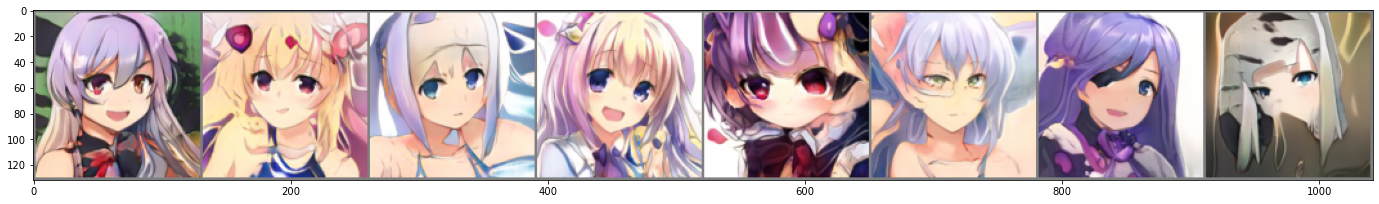

In [26]:
noise = torch.randn((num_images, 512, 1, 1)).to(device)
images = gen(noise, step, alpha)
images = make_grid(images).permute(1,2,0)*0.5 + 0.5
plt.figure(figsize=(24, 24))
plt.imshow(images)
plt.show()

